# 프로젝트 진행 공간
- 데이터에 대한 전처리 과정을 포함해 주세요.
- 독립 변수 간의 여러 유의미한 관계를 시각화 해주세요.
- EDA를 통해 얻어진 인사이트를 작성해주세요.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib



font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font',family=font)

## EDA 구간

1. 데이터 로드
    - 다양한 소스에서 데이터를 로드한다. (파일, 데이터베이스, API 등에서 데이터를 불러온다.)
    - 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.

In [17]:
import pandas as pd
import glob

# 연도별 CSV 파일 불러오기 
file_paths = glob.glob("data/*.csv")

# csv 파일 합치기
df_list = [pd.read_csv(file) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

# csv 파일 저장
df.to_csv("all.csv", index=False, encoding="utf-8")




2. 데이터 구조 및 기초 통계 확인
    - 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
    - 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
    - df.head(), df.info(), df.describe() 등의 함수를 사용한다.

In [18]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      458 non-null    object 
 1   연도      458 non-null    int64  
 2   WAR     458 non-null    float64
 3   득점      458 non-null    int64  
 4   안타      458 non-null    int64  
 5   2루타     458 non-null    int64  
 6   3루타     458 non-null    int64  
 7   홈런      458 non-null    int64  
 8   타점      458 non-null    int64  
 9   도루      406 non-null    float64
 10  볼넷      458 non-null    int64  
 11  사구      458 non-null    int64  
 12  고의사구    458 non-null    int64  
 13  삼진      458 non-null    int64  
 14  병살      458 non-null    int64  
 15  희생타     458 non-null    int64  
 16  희생플라이   458 non-null    int64  
 17  타율      458 non-null    float64
 18  출루      458 non-null    float64
 19  장타      458 non-null    float64
 20  OPS     458 non-null    float64
 21  wRC+    458 non-null    float64
 22  수상

3. 결측치 및 이상치 탐색
    - 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
    - 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
    - df.isnull().sum(), df.boxplot() 등의 함수를 활용한다.

이름        0
연도        0
WAR       0
득점        0
안타        0
2루타       0
3루타       0
홈런        0
타점        0
도루       16
볼넷        0
사구        0
고의사구      0
삼진        0
병살        0
희생타       0
희생플라이     0
타율        0
출루        0
장타        0
OPS       0
wRC+      0
수상여부      0
dtype: int64


KeyError: 0

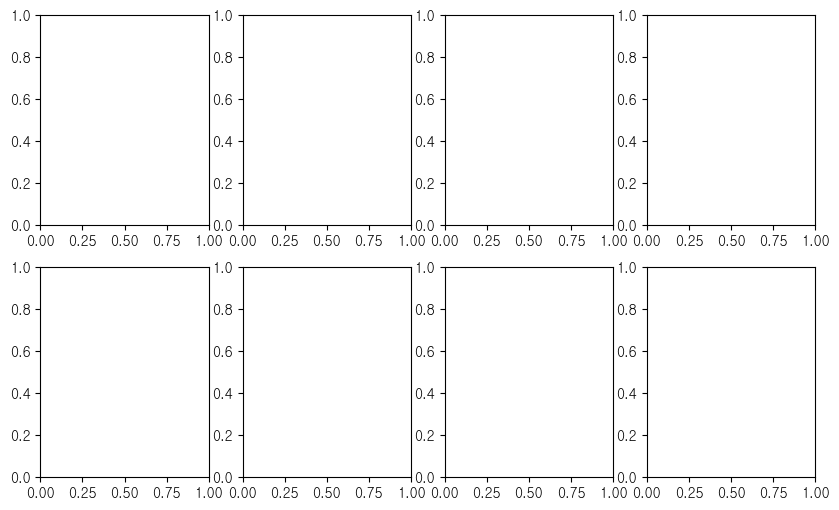

In [ ]:
print(df.isnull().sum())

fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(10,6))

selected_features = ['WAR', '타율', '홈런', '장타', 'OPS', 'wRC+', '안타', '출루']

# 그래프 생성
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(selected_features):
    sns.boxplot(x='수상여부', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs 수상여부')


plt.show()
# WAR, 타율, 홈런, 장타율, OPS, wRC+, 안타, 출루루

4. 데이터 시각화를 통한 탐색
    - 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
    - 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
    - sns.countplot(), sns.heatmap() 등의 함수를 사용한다.

5. 데이터 정제 및 전처리
    - 필요 없는 변수나 중복 데이터를 제거한다.
    - 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다. 
    - df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 활용한다.

In [20]:
# 선수명 기준으로 중복 제거 (첫 번째 등장한 데이터 유지)
df = df.drop_duplicates(subset=['이름'], keep='first')
print(df.info())
print(df.describe())  
print(df['이름'].nunique())  # 중복을 제외한 고유한 값 개수



<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 0 to 456
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      132 non-null    object 
 1   연도      132 non-null    int64  
 2   WAR     132 non-null    float64
 3   득점      132 non-null    int64  
 4   안타      132 non-null    int64  
 5   2루타     132 non-null    int64  
 6   3루타     132 non-null    int64  
 7   홈런      132 non-null    int64  
 8   타점      132 non-null    int64  
 9   도루      116 non-null    float64
 10  볼넷      132 non-null    int64  
 11  사구      132 non-null    int64  
 12  고의사구    132 non-null    int64  
 13  삼진      132 non-null    int64  
 14  병살      132 non-null    int64  
 15  희생타     132 non-null    int64  
 16  희생플라이   132 non-null    int64  
 17  타율      132 non-null    float64
 18  출루      132 non-null    float64
 19  장타      132 non-null    float64
 20  OPS     132 non-null    float64
 21  wRC+    132 non-null    float64
 22  수상여부   

6. 데이터 변환 및 피처 엔지니어링
    - 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
    - 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
    - np.log(), PolynomialFeatures() 등의 함수를 활용한다.

7. 데이터 분할
    - 학습용과 테스트용 데이터로 분할한다.
    - 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
    - train_test_split() 함수를 사용한다.

## 학습 구간(knn)